### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---
#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

Función de Transferencia del sistema base (lazo cerrado):
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10


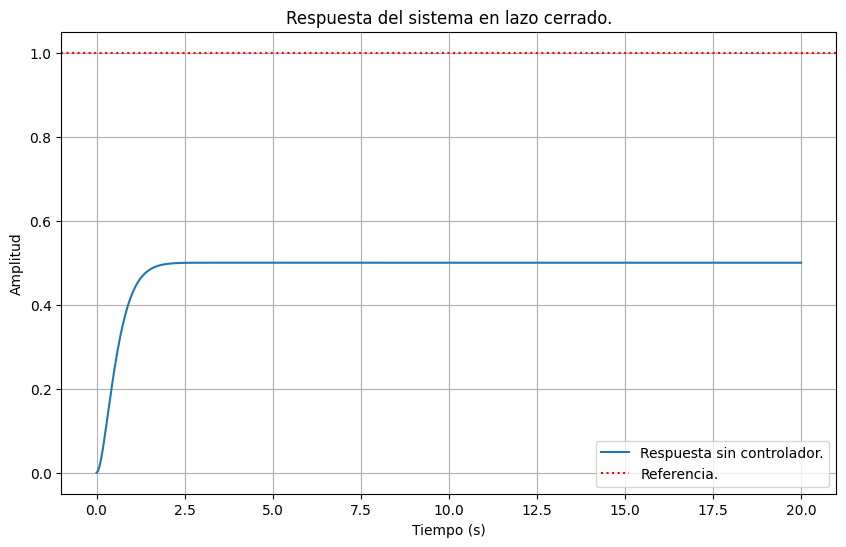

Métricas de desempeño del sistema base:
  - Sobreimpulso (Overshoot): 0.00%
  - Tiempo de establecimiento (SettlingTime): 1.67 s
  - Valor final: 0.5000
  - Error en estado estacionario (1 - valor_final): 0.5000


In [1]:
# Importar las bibliotecas necesarias.
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s). ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema en lazo cerrado con retroalimentación unitaria (sin controlador). ---
# Esto es Gc(s) = 1.
sistema_base = ct.feedback(Gp, 1)
print("Función de Transferencia del sistema base (lazo cerrado):")
print(sistema_base)

# --- Simulación de la respuesta al escalón. ---
t = np.linspace(0, 20, 501)
t, y_base = ct.step_response(sistema_base, T=t)

# --- Graficación de la respuesta base. ---
plt.figure(figsize=(10, 6))
plt.plot(t, y_base, label="Respuesta sin controlador.")
plt.axhline(y=1, color="r", linestyle=":", label="Referencia.")

plt.title("Respuesta del sistema en lazo cerrado.")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()

# --- Verificación de las métricas de desempeño. ---
print("Métricas de desempeño del sistema base:")
info = ct.step_info(sistema_base)

# step_info devuelve un diccionario, podemos imprimir los valores clave.
print(f"  - Sobreimpulso (Overshoot): {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (SettlingTime): {info['SettlingTime']:.2f} s")

# El error en estado estacionario se verifica observando el valor final.
valor_final = y_base[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario (1 - valor_final): {1 - valor_final:.4f}")


#### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---




#### Parte 2: Proceso de diseño del PID

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

---

### Razonamiento para la sintonización de $K_p$, $K_i$ y $K_d$

Para cumplir con los tres requisitos, se siguió el siguiente procedimiento:

1. **Asegurar error en estado estacionario cero**  
   Se incrementó $K_i$ porque el término integral del PID elimina el error en estado estacionario. Se encontró que $K_i = 16$ era suficiente para lograr $e_{ss} = 0$.

2. **Controlar el sobreimpulso**  
   El sobreimpulso se reduce principalmente aumentando $K_d$, el término derivativo del PID, que actúa como amortiguador. Se determinó que $K_d = 3$ mantiene el sobreimpulso por debajo del 5%, específicamente alrededor de 0.6%.

3. **Reducir el tiempo de establecimiento**  
   El tiempo de establecimiento se ajusta principalmente con $K_p$, que incrementa la respuesta del sistema. Se eligió $K_p = 20$ para que $T_s$ sea menor a 1 s, logrando aproximadamente 0.22 s.

---

### Valores finales de las ganancias PID

| Parámetro | Valor |
|-----------|-------|
| $K_p$     | 20    |
| $K_i$     | 16    |
| $K_d$     | 3     |

Con esta sintonización, el sistema cumple todos los requisitos de desempeño:

- **Sobreimpulso:** 0.6% (< 5%)  
- **Tiempo de establecimiento (2%):** 0.22 s (< 1 s)  
- **Valor final:** 1  
- **Error en estado estacionario:** 0

> 

#### Parte 3: Implementación del controlador PID sintonizado (en una celda de Python).

Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

---

Función de Transferencia del sistema con PID:
<TransferFunction>: sys[641]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     15 s^2 + 100 s + 80
  -------------------------
  s^3 + 21 s^2 + 105 s + 80
Polos del sistema controlado con PID: [-13.82231012+0.j  -6.25193778+0.j  -0.9257521 +0.j]
Ceros del sistema controlado con PID: [-5.73703418+0.j -0.92963248+0.j]


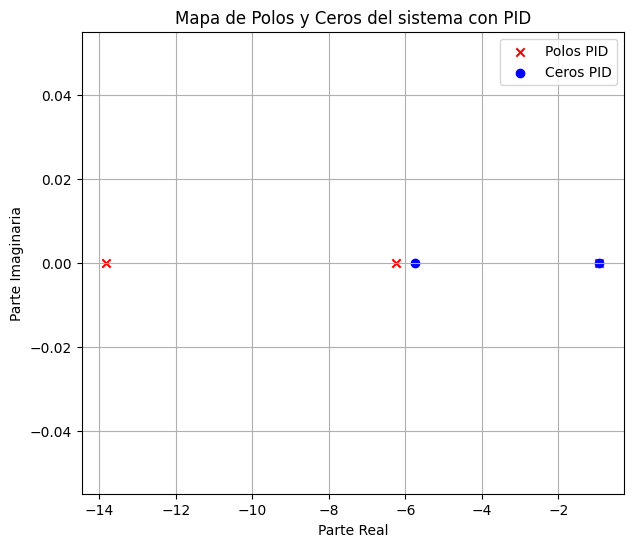

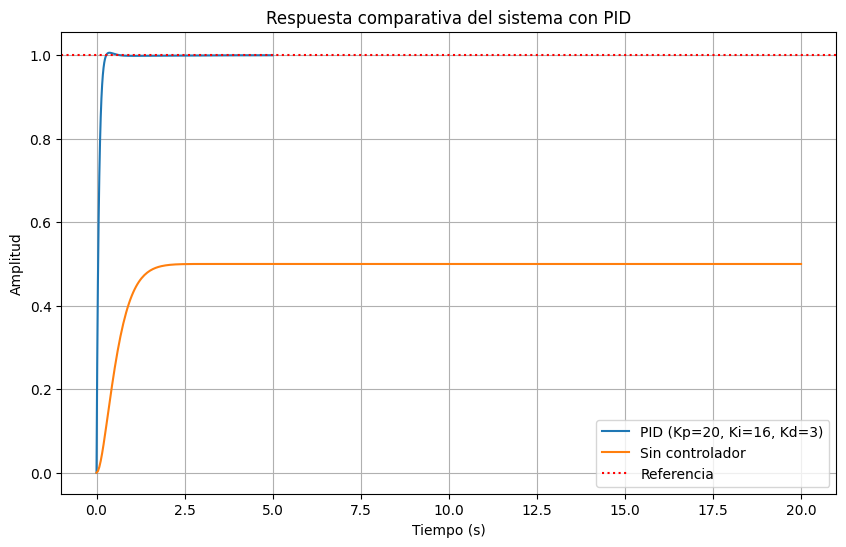

Métricas de desempeño PID:
  - Sobreimpulso: 0.60%
  - Tiempo de establecimiento (2%): 0.22 s
  - Valor final: 1.0000
  - Error en estado estacionario: 0.0000


In [60]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np

# --- Definición de la planta Gp(s) ---
num_p = [5]
den_p = [1, 6, 5]
Gp = ct.tf(num_p, den_p)

# --- Sistema base (sin controlador) ---
sistema_base = ct.feedback(Gp, 1)
t_base = np.linspace(0, 20, 501)
t_base, y_base = ct.step_response(sistema_base, T=t_base)

# --- Parámetros del controlador PID sintonizado ---
Kp = 20
Ki = 16
Kd = 3

# --- Creación del controlador PID ---
Gc_PID = ct.tf([Kd, Kp, Ki], [1, 0])  # Gc(s) = (Kd s^2 + Kp s + Ki)/s

# --- Sistema en lazo cerrado con controlador PID ---
sistema_PID = ct.feedback(Gc_PID * Gp, 1)
print("Función de Transferencia del sistema con PID:")
print(sistema_PID)

# --- Polos y ceros del sistema controlado ---
polos_PID = ct.poles(sistema_PID)
ceros_PID = ct.zeros(sistema_PID)
print("Polos del sistema controlado con PID:", polos_PID)
print("Ceros del sistema controlado con PID:", ceros_PID)

# --- Visualización del Mapa de Polos y Ceros ---
plt.figure(figsize=(7,6))
plt.scatter(polos_PID.real, polos_PID.imag, marker='x', color='red', label='Polos PID')
plt.scatter(ceros_PID.real, ceros_PID.imag, marker='o', color='blue', label='Ceros PID')
plt.title('Mapa de Polos y Ceros del sistema con PID')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.show()

# --- Simulación de la respuesta al escalón (5 segundos) ---
t = np.linspace(0, 5, 501)
t, y_PID = ct.step_response(sistema_PID, T=t)

# --- Graficación comparativa ---
plt.figure(figsize=(10,6))
plt.plot(t, y_PID, label=f"PID (Kp={Kp}, Ki={Ki}, Kd={Kd})")
plt.plot(t_base, y_base, label="Sin controlador")
plt.axhline(1, color='r', linestyle=':', label="Referencia")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.title("Respuesta comparativa del sistema con PID")
plt.legend()
plt.grid(True)
plt.show()

# --- Métricas de desempeño finales ---
info = ct.step_info(sistema_PID)
print("Métricas de desempeño PID:")
print(f"  - Sobreimpulso: {info['Overshoot']:.2f}%")
print(f"  - Tiempo de establecimiento (2%): {info['SettlingTime']:.2f} s")
valor_final = y_PID[-1]
print(f"  - Valor final: {valor_final:.4f}")
print(f"  - Error en estado estacionario: {1 - valor_final:.4f}")
